# Hands-On Data Preprocessing in Python
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 11: Data Cleaning Level III
### **Outliers (sólo Univariate outlier detection)**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Detecting Outliers
## Univariate Outlier detection

In [6]:
response_df = pd.read_csv('responses.csv')
response_df.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


#### Example of detecting outliers across one numerical attribute

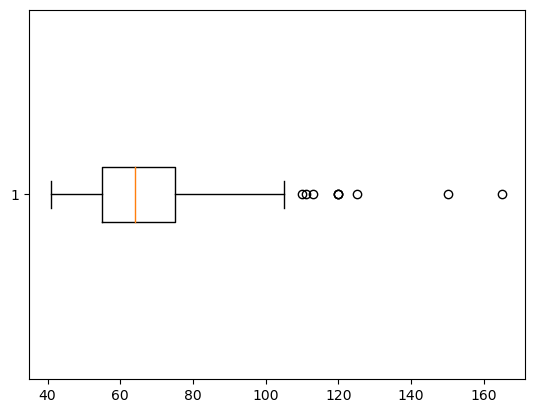

In [7]:
fig = plt.boxplot(response_df.Weight.dropna(),vert=False)

In [8]:
response_df[response_df.Weight>105]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


In [9]:
print(fig)

{'whiskers': [<matplotlib.lines.Line2D object at 0x000002500AC0EF10>, <matplotlib.lines.Line2D object at 0x000002500AC0FB90>], 'caps': [<matplotlib.lines.Line2D object at 0x000002500AC1C750>, <matplotlib.lines.Line2D object at 0x000002500AC1D190>], 'boxes': [<matplotlib.lines.Line2D object at 0x000002500AC0E690>], 'medians': [<matplotlib.lines.Line2D object at 0x000002500AC1DCD0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000002500AC1E7D0>], 'means': []}


In [10]:
fig['fliers'][0].get_data()

(array([120., 110., 111., 120., 113., 125., 165., 120., 150.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [11]:
Q1 = response_df.Weight.quantile(0.25)
Q3 = response_df.Weight.quantile(0.75)
IQR = Q3-Q1

BM = (response_df.Weight > (Q3+1.5 *IQR)) | (response_df.Weight < (Q1-1.5 *IQR))
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


#### Example of detecting outliers across one categorical attribute

In [12]:
response_df.Education.value_counts()

secondary school                    621
college/bachelor degree             212
masters degree                       81
primary school                       80
currently a primary school pupil     10
doctorate degree                      5
Name: Education, dtype: int64

<Axes: >

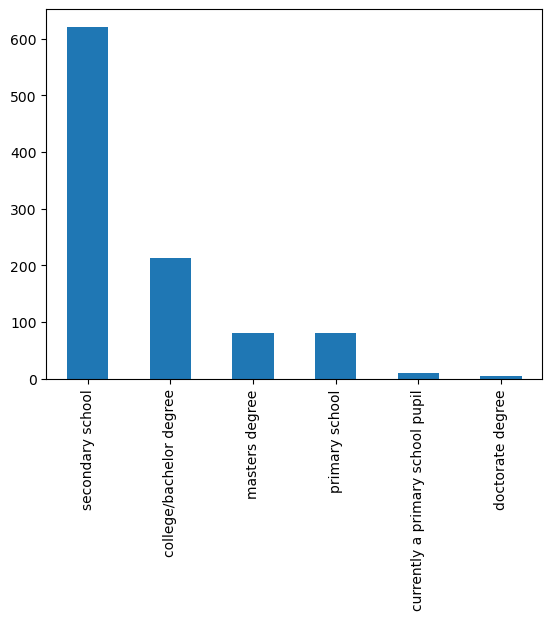

In [13]:
response_df.Education.value_counts().plot.bar()

# Dealing with outliers
## Example 1

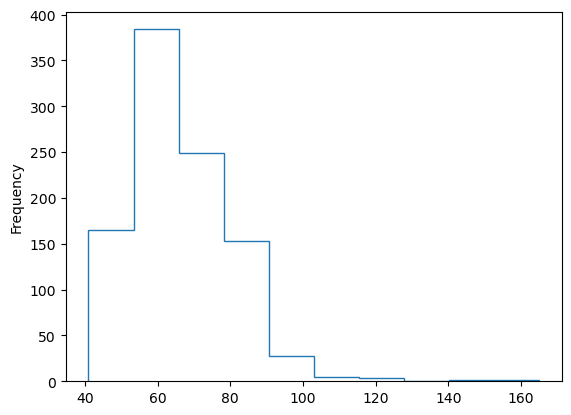

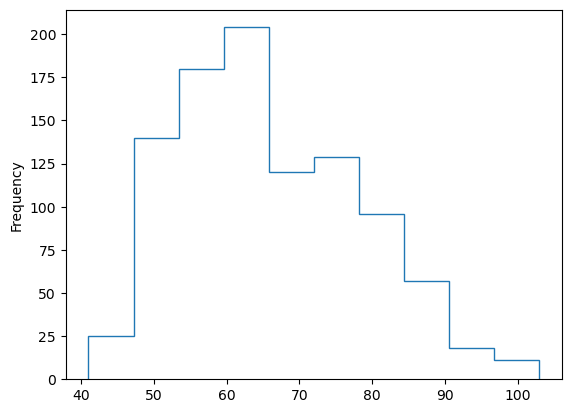

In [14]:
response_df.Weight.plot.hist(histtype='step')
plt.show()
BM = response_df.Weight<105
response_df.Weight[BM].plot.hist(histtype='step')
plt.show()

## Example 2

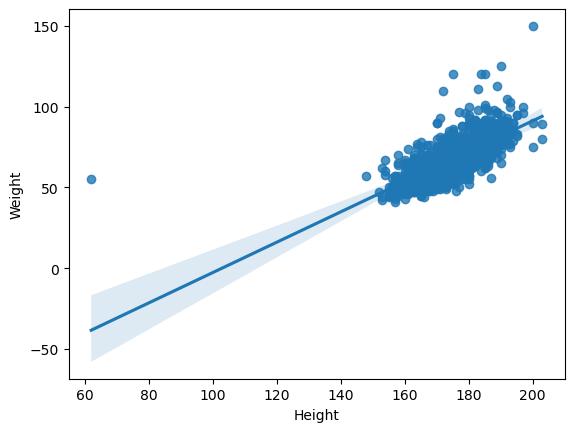

In [15]:
sns.regplot(x='Height', y='Weight',data=response_df)
plt.show()

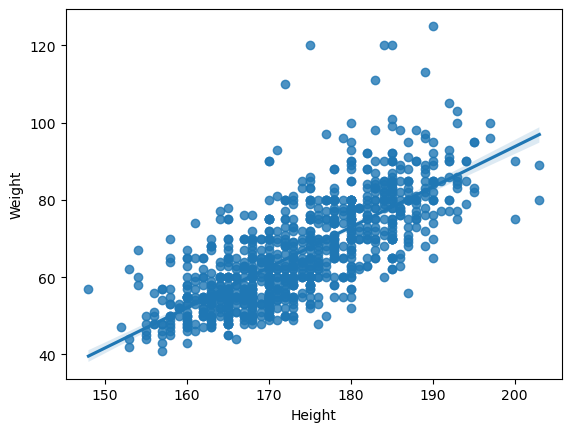

In [16]:
BM = (response_df.Weight>130) | (response_df.Height<70)
sns.regplot(x='Height',y='Weight',data=response_df[~BM])
plt.show()

### Example 3

#### Dealing with missing values

In [17]:
select_attributes = ['Weight','Height','Gender']
pre_process_df = pd.DataFrame(response_df[select_attributes])
pre_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  990 non-null    float64
 1   Height  990 non-null    float64
 2   Gender  1004 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.8+ KB


In [18]:
pre_process_df.dropna(inplace=True)

In [19]:
pre_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  975 non-null    float64
 1   Height  975 non-null    float64
 2   Gender  975 non-null    object 
dtypes: float64(2), object(1)
memory usage: 30.5+ KB


#### Detecting univariate outliers and dealing with them

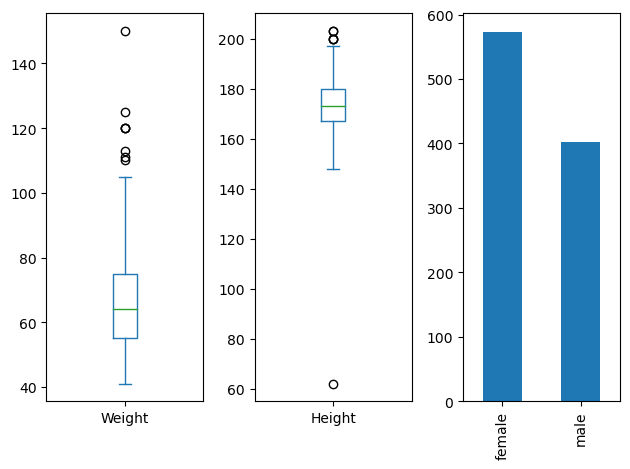

In [20]:
num_attributes = ['Weight','Height']
for i,att in enumerate(num_attributes):
    plt.subplot(1,3,i+1)
    pre_process_df[att].plot.box()

plt.subplot(1,3,3)
pre_process_df.Gender.value_counts().plot.bar()
plt.tight_layout()
plt.show()

In [21]:
Q3 = pre_process_df.Weight.quantile(0.75)
Q1 = pre_process_df.Weight.quantile(0.25)
IQR = Q3 - Q1

upper_cap = Q3+IQR*1.5

BM = pre_process_df.Weight > upper_cap
pre_process_df.loc[pre_process_df[BM].index,'Weight'] = upper_cap

<Axes: >

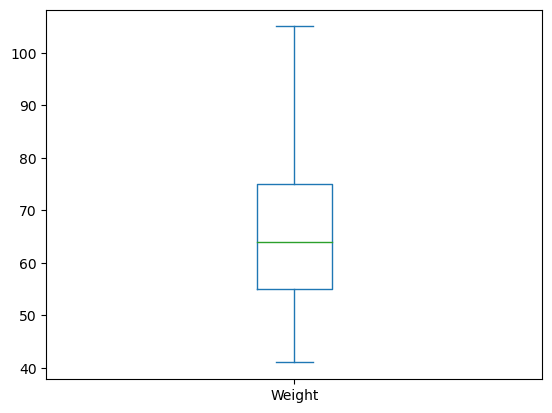

In [22]:
pre_process_df.Weight.plot.box()

In [23]:
Q3 = pre_process_df.Height.quantile(0.75)
Q1 = pre_process_df.Height.quantile(0.25)
IQR = Q3 - Q1

lower_cap = Q1-IQR*1.5
upper_cap = Q3+IQR*1.5

BM = pre_process_df.Height < lower_cap
pre_process_df.loc[pre_process_df[BM].index,'Height'] = lower_cap

BM = pre_process_df.Height > upper_cap
pre_process_df.loc[pre_process_df[BM].index,'Height'] = upper_cap

<Axes: >

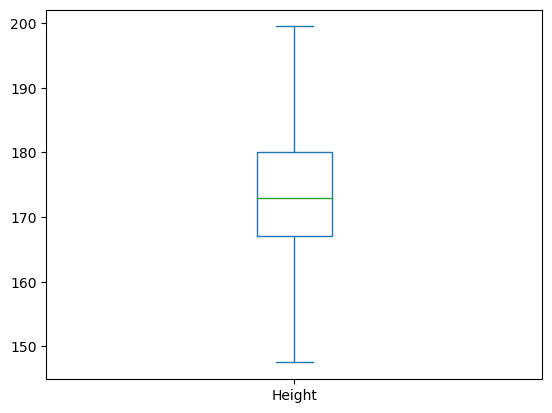

In [24]:
pre_process_df.Height.plot.box()